##Data Preparation

In [ ]:
#import packages
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#training_set_features
from google.colab import files
uploaded = files.upload()
import io
training_set_features = pd.read_csv(io.BytesIO(uploaded['training_set_features.csv']), 
    index_col="respondent_id")

#training_set_labels
from google.colab import files
uploaded = files.upload()
import io
training_set_labels = pd.read_csv(io.BytesIO(uploaded['training_set_labels.csv']), 
    index_col="respondent_id")

Saving training_set_features.csv to training_set_features (1).csv


Saving training_set_labels.csv to training_set_labels (1).csv


In [ ]:
print("training_set_features.shape", training_set_features.shape)
training_set_features.head() #26707 observation and 35 feature

training_set_features.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
print("training_set_labels.shape", training_set_labels.shape)
training_set_labels.head() #26707 observation and 3 feature

training_set_labels.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


##Data Exploration

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

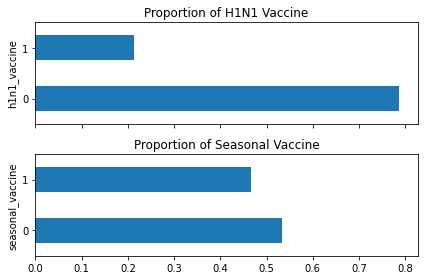

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = training_set_labels.shape[0]

(training_set_labels['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(training_set_labels['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [ ]:
pd.crosstab(
    training_set_labels["h1n1_vaccine"], 
    training_set_labels["seasonal_vaccine"], 
    margins=True,
    normalize=True
)
##seasonal vaccine is a 50/50 balence data but h1n1 is a bit imbalence

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [ ]:
(training_set_labels["h1n1_vaccine"]
     .corr(training_set_labels["seasonal_vaccine"])
)
##positive correlation means that ppl get seasonal or h1n1 will have a higher chance of getting another one increase as well

0.37714265306144495

In [ ]:
joined_df = training_set_labels.join(training_set_features)
print(joined_df.shape)
#joined_df.head()

(26707, 37)


## Dealing with NA's

In [ ]:
range(training_set_features.shape[1])

range(0, 35)

In [ ]:
training_set_features.iloc[:,1]

respondent_id
0        0.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
26702    0.0
26703    2.0
26704    2.0
26705    1.0
26706    0.0
Name: h1n1_knowledge, Length: 26707, dtype: float64

In [ ]:
training_set_features.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [ ]:
for i in range(training_set_features.shape[1]):
	# count number of rows with missing values
	n_miss = training_set_features.iloc[:,i].isnull().sum()
	perc = n_miss / training_set_features.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 92 (0.3%)
> 1, Missing: 116 (0.4%)
> 2, Missing: 71 (0.3%)
> 3, Missing: 208 (0.8%)
> 4, Missing: 19 (0.1%)
> 5, Missing: 42 (0.2%)
> 6, Missing: 87 (0.3%)
> 7, Missing: 82 (0.3%)
> 8, Missing: 128 (0.5%)
> 9, Missing: 2160 (8.1%)
> 10, Missing: 2160 (8.1%)
> 11, Missing: 971 (3.6%)
> 12, Missing: 820 (3.1%)
> 13, Missing: 804 (3.0%)
> 14, Missing: 12274 (46.0%)
> 15, Missing: 391 (1.5%)
> 16, Missing: 388 (1.5%)
> 17, Missing: 395 (1.5%)
> 18, Missing: 462 (1.7%)
> 19, Missing: 514 (1.9%)
> 20, Missing: 537 (2.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 1407 (5.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 4423 (16.6%)
> 26, Missing: 1408 (5.3%)
> 27, Missing: 2042 (7.6%)
> 28, Missing: 1463 (5.5%)
> 29, Missing: 0 (0.0%)
> 30, Missing: 0 (0.0%)
> 31, Missing: 249 (0.9%)
> 32, Missing: 249 (0.9%)
> 33, Missing: 13330 (49.9%)
> 34, Missing: 13470 (50.4%)


Missing Values - Analysis
- health_insurance is likely Missing Not At Random (MNAR) as the missing data appears to be correlated with other features
- income_poverty is also likely Missing Not At Random (MNAR) as the missing data is correlated with education, rent_or_own, employment_status, etc. features

Heat Map: blue=high correlation of missingness; red=low correlation of missingness

Dendogram: tree diagram that groups similar objects in close branches; describes the correlations in missingness by grouping similarly missing columns together

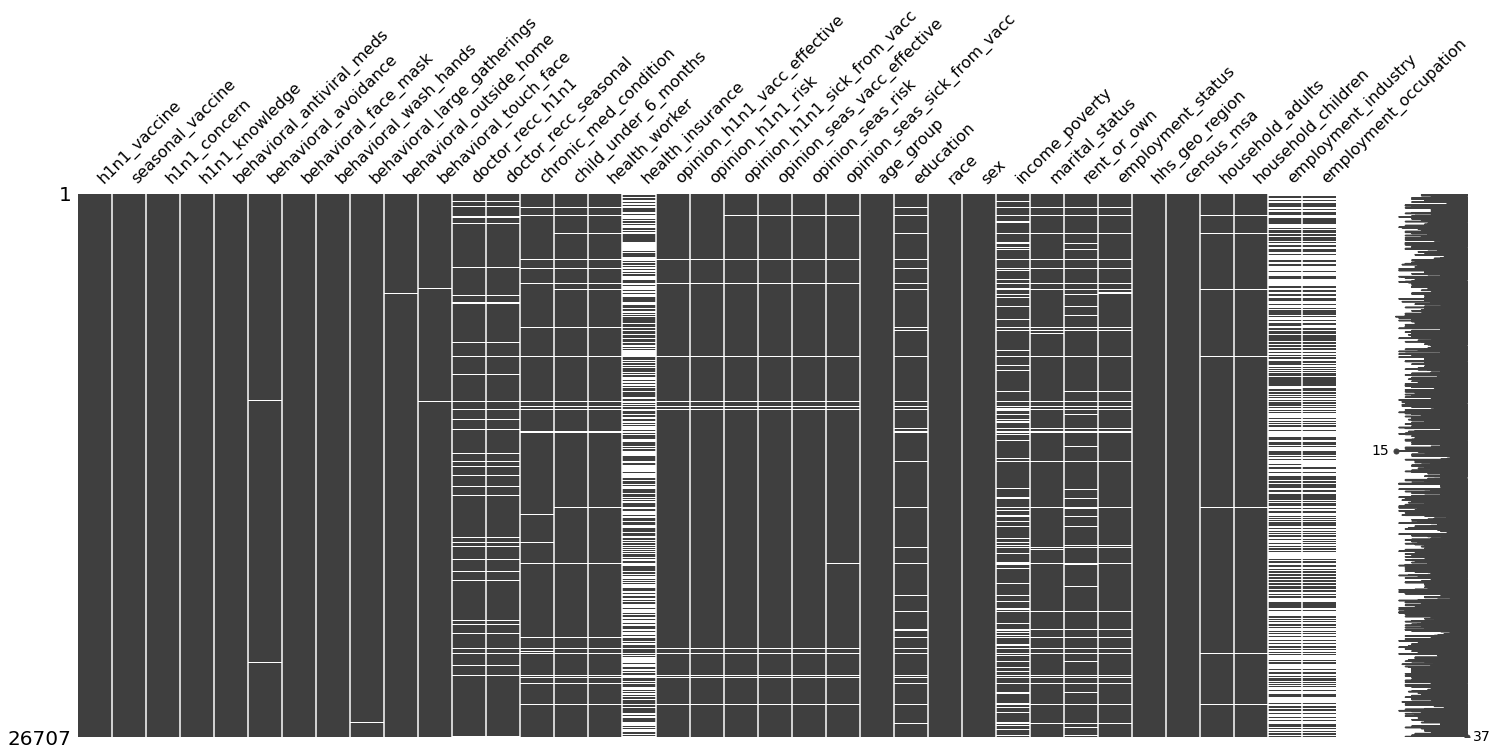

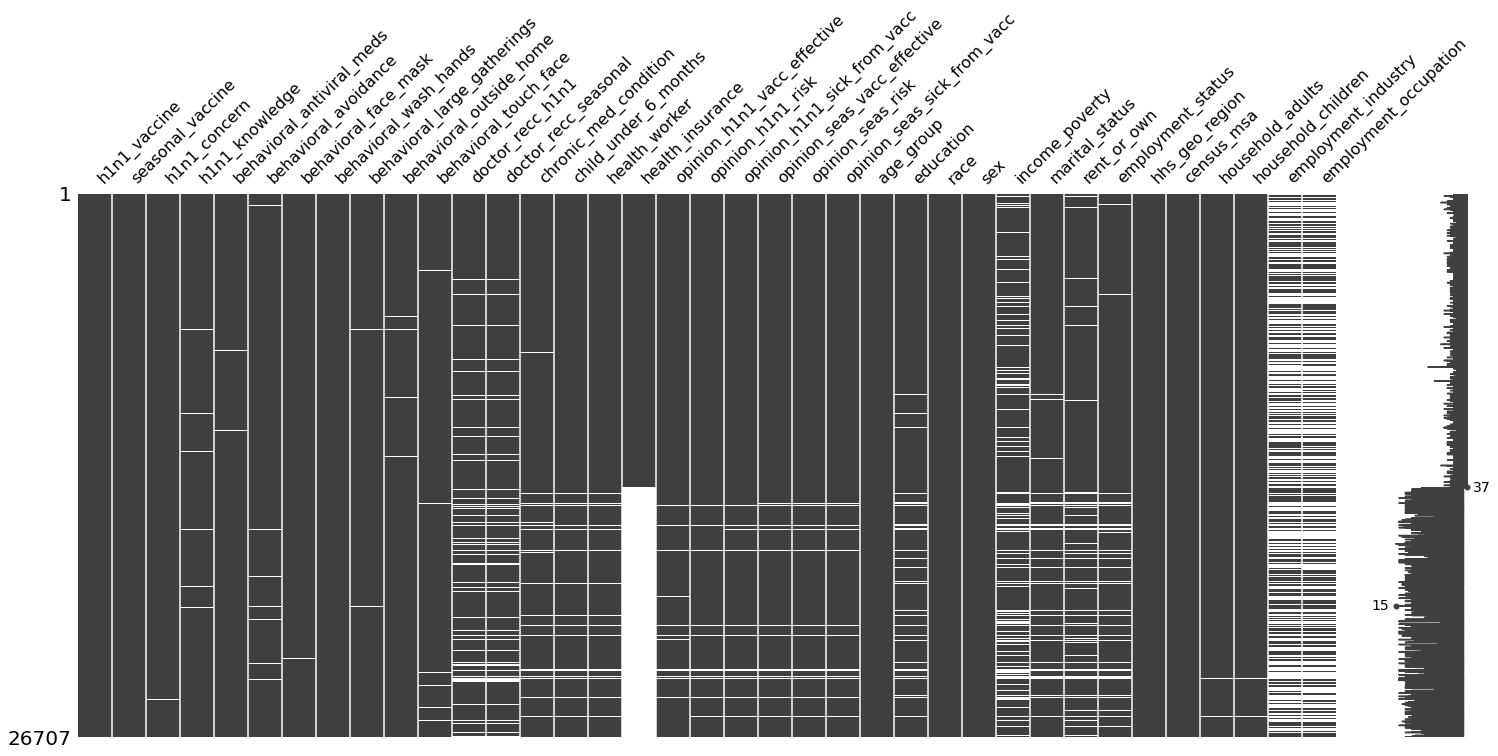

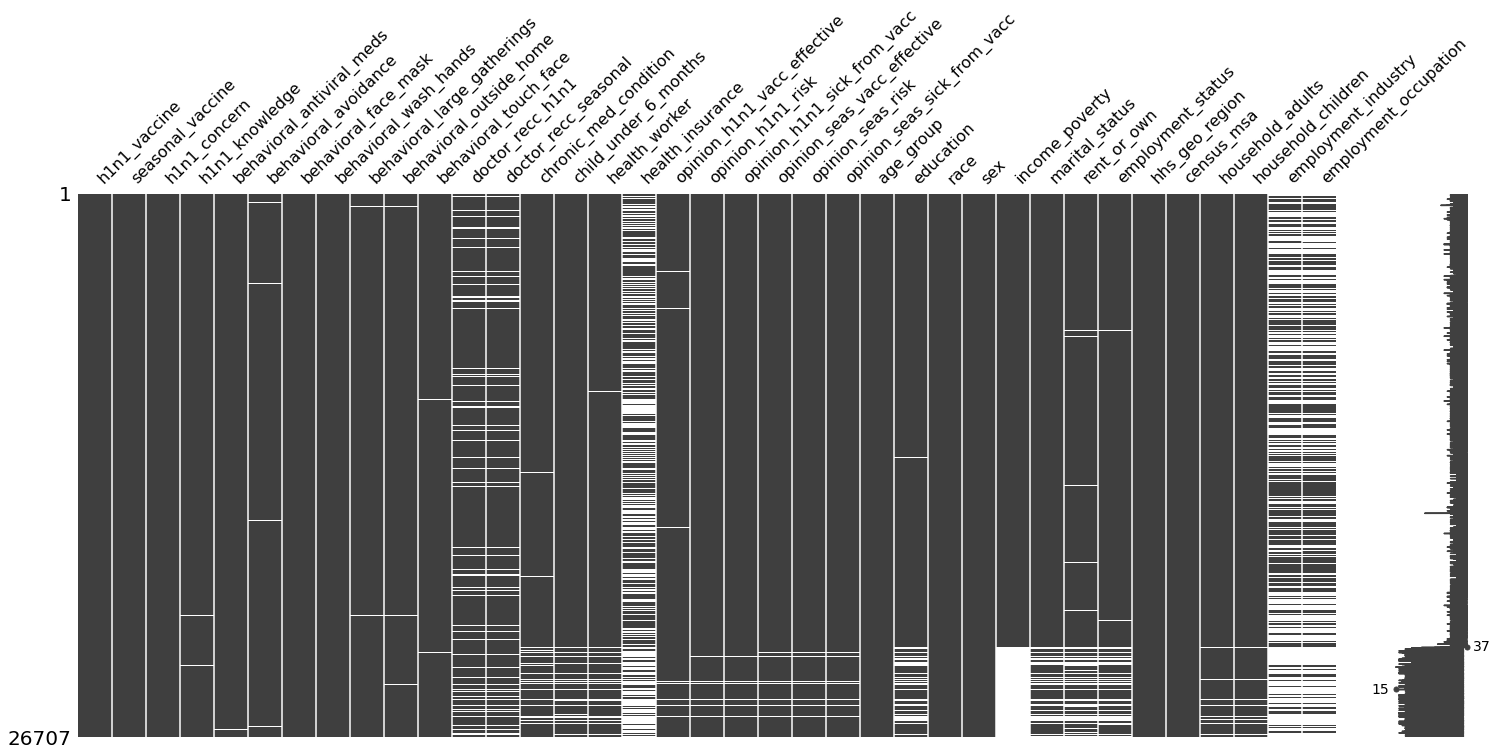

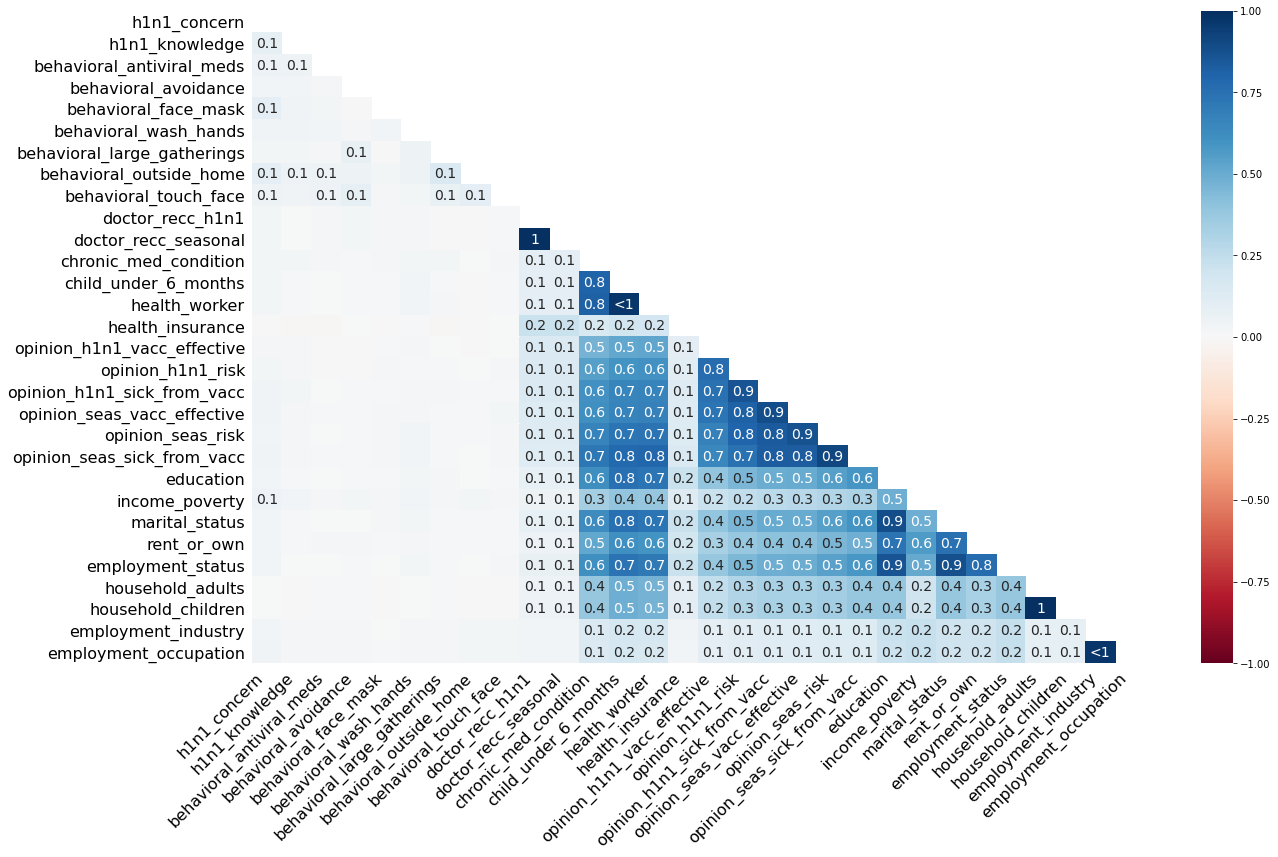

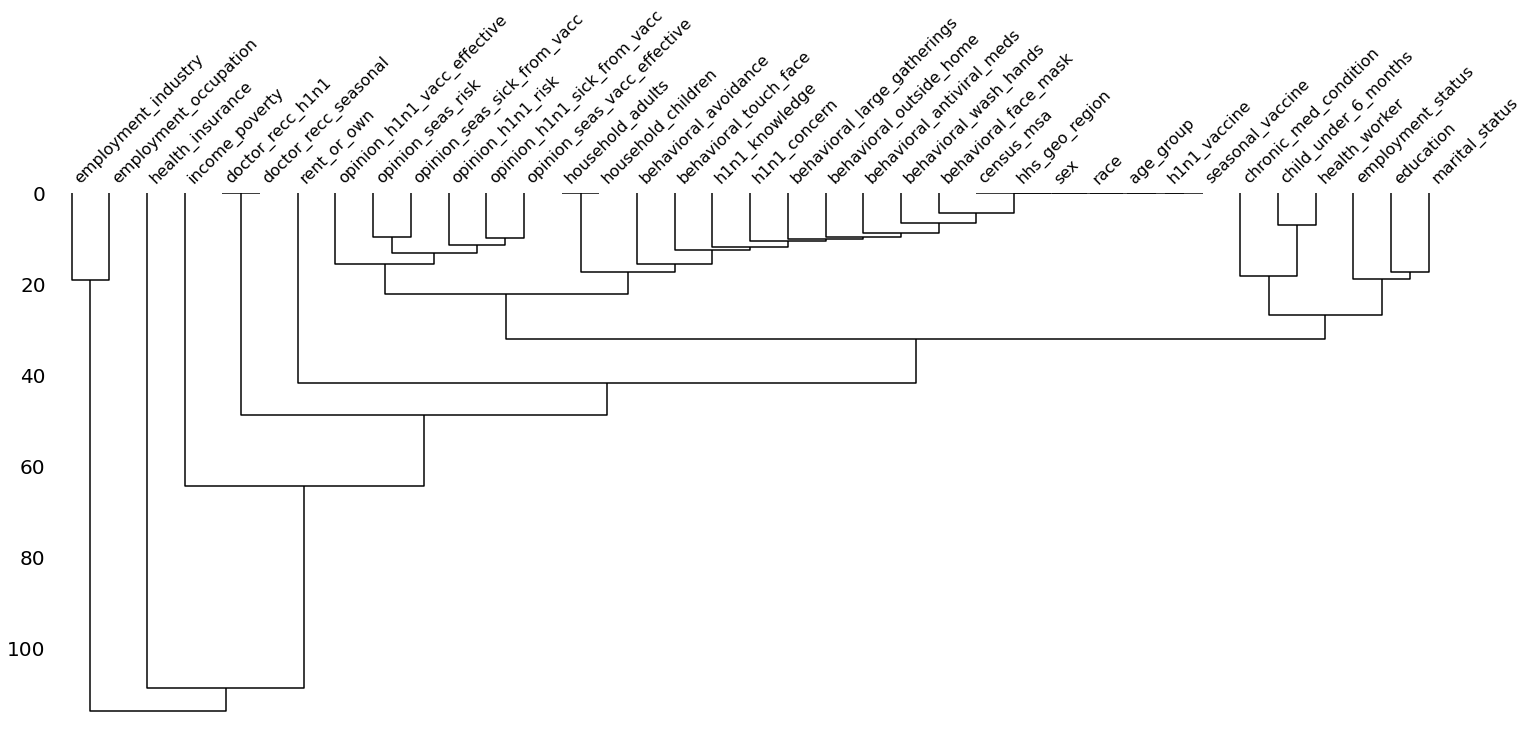

In [ ]:
import missingno as msno

msno.matrix(joined_df)

sorted_insurance = joined_df.sort_values('health_insurance')
msno.matrix(sorted_insurance)

sorted_poverty = joined_df.sort_values('income_poverty')
msno.matrix(sorted_poverty)

msno.heatmap(joined_df)

msno.dendrogram(joined_df)


##Feature engenering

In [ ]:
!pip install -U featuretools
import featuretools as ft

In [ ]:
# creating and entity set 'es'
es = ft.EntitySet(id = 'information')

# adding a dataframe 
es.entity_from_dataframe(entity_id = 'data', dataframe = training_set_features, index = 'respondent_id')

/usr/local/lib/python3.7/dist-packages/featuretools/entityset/entity.py:463: UserWarning: index respondent_id not found in dataframe, creating new integer column
  "integer column".format(index))


Entityset: information
  Entities:
    data [Rows: 26707, Columns: 36]
  Relationships:
    No relationships

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import featuretools as ft

# Load data and put into dataframe
df = pd.DataFrame(training_set_features)

In [ ]:
# Make an entityset and add the entity
es = ft.EntitySet(id = 'iris')
es.entity_from_dataframe(entity_id = 'data', dataframe = df)

# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data',
                                      trans_primitives = [
                                                          'add_numeric',
                                                          'multiply_numeric'
                                                          ])

feature_matrix.head()

/usr/local/lib/python3.7/dist-packages/featuretools/entityset/entity.py:452: UserWarning: Using first column as index. To change this, specify the index parameter
  warnings.warn(("Using first column as index. "
/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:152: UserWarning: Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn("Only one entity in entityset, changing max_depth to "


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,behavioral_antiviral_meds + behavioral_avoidance,behavioral_antiviral_meds + behavioral_face_mask,behavioral_antiviral_meds + behavioral_large_gatherings,behavioral_antiviral_meds + behavioral_outside_home,behavioral_antiviral_meds + behavioral_touch_face,...,health_insurance * opinion_h1n1_vacc_effective,health_insurance * opinion_seas_risk,health_insurance * opinion_seas_sick_from_vacc,health_insurance * opinion_seas_vacc_effective,health_worker * household_adults,health_worker * household_children,health_worker * opinion_h1n1_risk,health_worker * opinion_h1n1_sick_from_vacc,health_worker * opinion_h1n1_vacc_effective,health_worker * opinion_seas_risk,health_worker * opinion_seas_sick_from_vacc,health_worker * opinion_seas_vacc_effective,household_adults * household_children,household_adults * opinion_h1n1_risk,household_adults * opinion_h1n1_sick_from_vacc,household_adults * opinion_h1n1_vacc_effective,household_adults * opinion_seas_risk,household_adults * opinion_seas_sick_from_vacc,household_adults * opinion_seas_vacc_effective,household_children * opinion_h1n1_risk,household_children * opinion_h1n1_sick_from_vacc,household_children * opinion_h1n1_vacc_effective,household_children * opinion_seas_risk,household_children * opinion_seas_sick_from_vacc,household_children * opinion_seas_vacc_effective,opinion_h1n1_risk * opinion_h1n1_sick_from_vacc,opinion_h1n1_risk * opinion_h1n1_vacc_effective,opinion_h1n1_risk * opinion_seas_risk,opinion_h1n1_risk * opinion_seas_sick_from_vacc,opinion_h1n1_risk * opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc * opinion_h1n1_vacc_effective,opinion_h1n1_sick_from_vacc * opinion_seas_risk,opinion_h1n1_sick_from_vacc * opinion_seas_sick_from_vacc,opinion_h1n1_sick_from_vacc * opinion_seas_vacc_effective,opinion_h1n1_vacc_effective * opinion_seas_risk,opinion_h1n1_vacc_effective * opinion_seas_sick_from_vacc,opinion_h1n1_vacc_effective * opinion_seas_vacc_effective,opinion_seas_risk * opinion_seas_sick_from_vacc,opinion_seas_risk * opinion_seas_vacc_effective,opinion_seas_sick_from_vacc * opinion_seas_vacc_effective
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,...,3.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,2.0,2.0,6.0,2.0,4.0,4.0,3.0,6.0,6.0,2.0,2.0,4.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1.0,0.0,0.0,1.0,1.0,...,5.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,20.0,8.0,16.0,16.0,20.0,8.0,16.0,16.0,10.0,20.0,20.0,8.0,8.0,16.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,6.0,2.0,4.0,8.0,0.0,0.0,0.0,0.0,0

In [ ]:
training_set_features = feature_matrix

##Data Cleaning and Pipeline Creation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

In [ ]:
numeric_cols = training_set_features.columns[training_set_features.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children' 'behavioral_antiviral_meds + behavioral_avoidance'
 'behavioral_antiviral_meds + behavioral_face_mask'
 'behavioral_antiviral_meds + behavioral_large_gatherings'
 'behavioral_antiviral_meds + behavioral_outside_home'
 'behavioral_antiviral_meds + behavioral_touch_face'
 'behavioral_antiviral_meds + behavioral_wash_hands'
 'behavioral_antiviral_meds + child_under_6_months'
 'behavioral_antiviral_meds + chronic_med_condition'
 'behavioral_antiviral_meds +

In [ ]:
Categorical = training_set_features.columns[training_set_features.dtypes == "object"].values
print(Categorical)

['age_group' 'education' 'race' 'sex' 'income_poverty' 'marital_status'
 'rent_or_own' 'employment_status' 'hhs_geo_region' 'census_msa'
 'employment_industry' 'employment_occupation']


In [ ]:
##V1
##replacing missing variables
##Feature engenering 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('si1',SimpleImputer(strategy='constant',fill_value='NAN')),                                      
    ('imputer', SimpleImputer(strategy='constant',missing_values = None, fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols),
        ('cat', categorical_transformer, Categorical)
    ],
    remainder = "drop"
)

In [ ]:
##V2
##replacing missing variables
##Feature engenering 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', KNNImputer(n_neighbors=17))
])

categorical_transformer = Pipeline(steps=[
    ('si1',SimpleImputer(strategy='constant',fill_value='NAN')),                                      
    ('imputer', SimpleImputer(strategy='constant',missing_values = None, fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols),
        ('cat', categorical_transformer, Categorical)
    ],
    remainder = "drop"
)
transformer = Pipeline([
         ('preprocessor', preprocessor)])


In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(
    training_set_features,
    training_set_labels,
    test_size=0.33,
    shuffle=True,
    stratify=training_set_labels,
    random_state=RANDOM_SEED
)

#Clustering - Unsupervised ML

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
##change code to run the model
estimators = (
    KMeans(random_state=42)
)
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])


# Train model
full_pipeline.fit(training_set_features)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standard_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('simple_imputer',
                                                                   KNNImputer(add_indicator=False,
                                                                    

In [ ]:
data=full_pipeline["preprocessor"].transform(training_set_features)

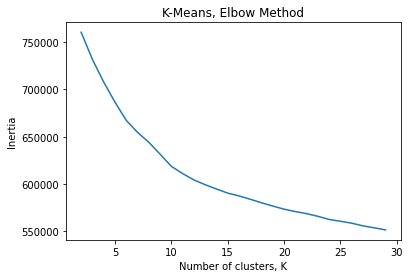

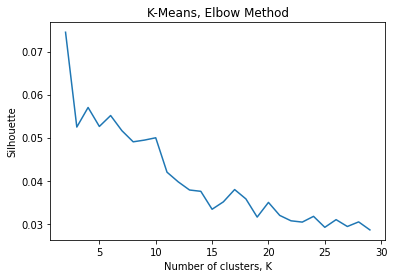

In [ ]:
#Impliment hyperparameter by running multiple K clusters 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


from IPython.core.interactiveshell import InteractiveShell

inertias = {}
silhouettes = {}
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(data, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score,davies_bouldin_score


seed_random = 1

fitted_kmeans = {}
labels_kmeans = {}
df_scores = []
k_values_to_try = np.arange(2, 31)
for n_clusters in k_values_to_try:
    
    #Perform clustering.
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=seed_random,
                    )
    labels_clusters = kmeans.fit_predict(data)
    
    #Insert fitted model and calculated cluster labels in dictionaries,
    #for further reference.
    fitted_kmeans[n_clusters] = kmeans
    labels_kmeans[n_clusters] = labels_clusters
    
    #Calculate various scores, and save them for further reference.
    silhouette = silhouette_score(data, labels_clusters)
    ch = calinski_harabasz_score(data, labels_clusters)
    db = davies_bouldin_score(data, labels_clusters)
    tmp_scores = {"n_clusters": n_clusters,
                  "silhouette_score": silhouette,
                  "calinski_harabasz_score": ch,
                  "davies_bouldin_score": db,
                  }
    df_scores.append(tmp_scores)

#Create a DataFrame of clustering scores, using `n_clusters` as index, for easier plotting.
df_scores = pd.DataFrame(df_scores)
df_scores.set_index("n_clusters", inplace=True)

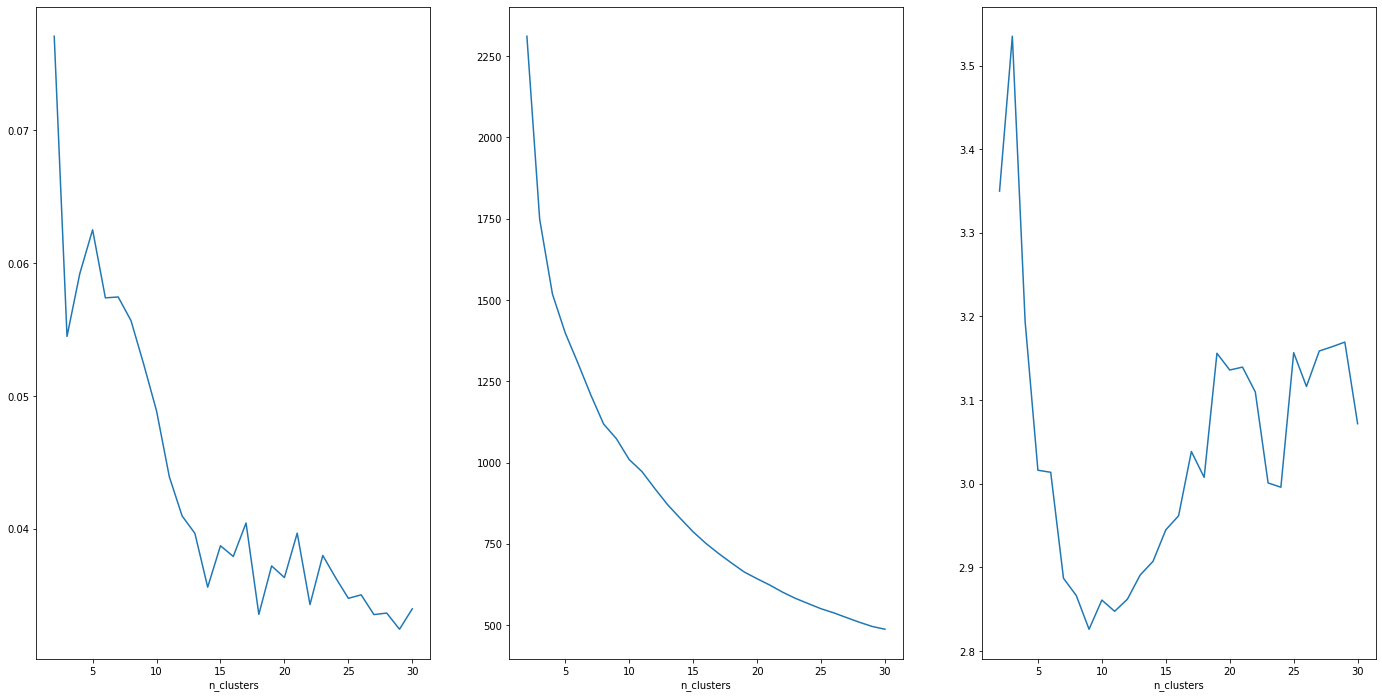

In [ ]:
from pylab import *
f, axes = plt.subplots(3, 6, figsize=(24, 12), sharex='col', sharey='col')
subplot(1,3,1)
df_scores["silhouette_score"].plot()
subplot(1,3,2)
df_scores["calinski_harabasz_score"].plot()
subplot(1,3,3)
df_scores["davies_bouldin_score"].plot()
#the optimal group are 16~18

In [ ]:
kmeans = KMeans(n_clusters=18,
                random_state=seed_random,
                )
labels_clusters = kmeans.fit_predict(pd.DataFrame(full_pipeline["preprocessor"].transform(training_set_features)))

In [ ]:
pd.DataFrame((labels_clusters).astype(np.int))

##data source

In [ ]:
full_pipeline["preprocessor"].transform(training_set_features)

array([[-1.73283816, -0.68006933, -2.05422803, ...,  0.        ,
         0.        ,  0.        ],
       [-1.73270842,  1.5141236 ,  1.19719683, ...,  0.        ,
         0.        ,  0.        ],
       [-1.73257867, -0.68006933, -0.4285156 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.73185787,  0.41702713,  1.19719683, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73198761, -0.68006933, -0.4285156 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73211735, -1.7771658 , -2.05422803, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
full_pipeline.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['encoder'].get_feature_names(Categorical)

array(['age_group_18 - 34 Years', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_12 Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_NAN', 'education_Some College', 'race_Black',
       'race_Hispanic', 'race_Other or Multiple', 'race_White',
       'sex_Female', 'sex_Male',
       'income_poverty_<= $75,000, Above Poverty',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_NAN', 'marital_status_Married',
       'marital_status_NAN', 'marital_status_Not Married',
       'rent_or_own_NAN', 'rent_or_own_Own', 'rent_or_own_Rent',
       'employment_status_Employed', 'employment_status_NAN',
       'employment_status_Not in Labor Force',
       'employment_status_Unemployed', 'hhs_geo_region_atmpeygn',
       'hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj',
       'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca',
       'hh

In [ ]:
full_pipeline.named_steps['preprocessor'].transformers_[1][1]

Pipeline(memory=None,
         steps=[('si1',
                 SimpleImputer(add_indicator=False, copy=True, fill_value='NAN',
                               missing_values=nan, strategy='constant',
                               verbose=0)),
                ('imputer',
                 SimpleImputer(add_indicator=False, copy=True,
                               fill_value='missing', missing_values=None,
                               strategy='constant', verbose=0)),
                ('encoder',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True))],
         verbose=False)

##model output

In [ ]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((18, 24))

for i, label in enumerate(training_set_features['Cluster ID'].unique()):
    means[i,:] = training_set_features[(training_set_features['Cluster ID'] ==label)].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(training_set_features['Cluster ID']==label)))
    print(means[i,:])
    
means

In [ ]:
#Display a chart that can see how each cluster is different x axis are each variable and y is in density 
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

cat_col_names = list(training_set_features.select_dtypes(include=np.object).columns)
num_col_names = list(training_set_features.select_dtypes(include=np.number).columns)

f, axes = plt.subplots(18, 37, figsize=(100, 100), sharex='col', sharey='col')
cols = [training_set_features for training_set_features in num_col_names]
cols += [training_set_features for training_set_features in cat_col_names]
rows = ['Cluster {}'.format(i+1) for i in np.arange(3)]

for i, label in enumerate(training_set_features['Cluster ID'].unique()):
    n = training_set_features[training_set_features['Cluster ID']==label]
  
    col_idx = 0
    for col in num_col_names:
        sns.distplot(training_set_features[[col]], hist=False, rug=False, label="All", ax=axes[i-1, col_idx]);
        chart = sns.distplot(n[[col]], hist=False, rug=False, label="Cluster {}".format(label), ax=axes[i-1,col_idx]);
        chart.set_yticklabels([])
        col_idx=col_idx+1
    for col in cat_col_names:
     
        all_prop_df = (training_set_features[col].value_counts(normalize=True).reset_index())
        all_prop_df['Cluster']= 'All'

        prop_df = (training_set_features[col]
           .value_counts(normalize=True)
           .reset_index())

        prop_df['Cluster']= 'Cluster {}'.format(label)

        prop_df = pd.concat([all_prop_df, prop_df])
        prop_df = prop_df.reset_index(drop=True)

        chart = sns.barplot(x='index', y=col, hue='Cluster', data=prop_df, ci=None, ax=axes[i-1, col_idx])
        #chart.set_xticklabels(chart.get_xticklabels(), rotation=55)
        
        col_idx=col_idx+1
for ax1 in axes:
    for ax in ax1:
        ax.set_ylabel('')
        ax.set_xlabel('')
        
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size='large')

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')

for j in np.arange(5):
    ax = axes[2,j]
    if j >= len(num_col_names): #Tmp hack to avoid rotating numeric lablels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#Logistic model

In [ ]:
#Logistic model
##change code to do the model
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1, max_iter=10000)
)

In [ ]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

In [ ]:
# Train model
full_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standard_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('simple_imputer',
                                                                   KNNImputer(add_indicator=False,
                                                                    

In [ ]:
# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)
preds

[array([[0.50865532, 0.49134468],
        [0.90901197, 0.09098803],
        [0.78244707, 0.21755293],
        ...,
        [0.94993911, 0.05006089],
        [0.93098914, 0.06901086],
        [0.93883761, 0.06116239]]), array([[0.38573586, 0.61426414],
        [0.53421241, 0.46578759],
        [0.20710832, 0.79289168],
        ...,
        [0.68885718, 0.31114282],
        [0.90905553, 0.09094447],
        [0.10482707, 0.89517293]])]

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.491345,0.614264
16516,0.090988,0.465788
3106,0.217553,0.792892
16981,0.739174,0.919562
19111,0.294588,0.801053


In [ ]:
roc_auc_score(y_eval, y_preds)

0.8440616481771691

In [ ]:
full_pipeline.fit(training_set_features, training_set_labels) 
None  

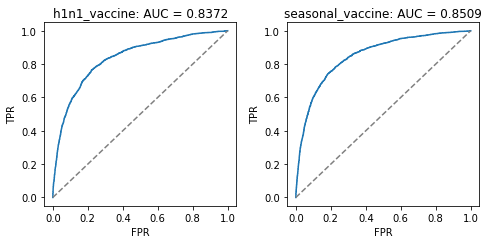

In [ ]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

# Random Forest 

In [ ]:
#KNeighbors model
##change code to do the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
estimators = MultiOutputClassifier(
    estimator= OneVsRestClassifier((RandomForestClassifier()))
)

In [ ]:
full_pipeline_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

In [ ]:
sorted(full_pipeline_rf.get_params().keys())
None

In [ ]:
#Still need to update
#from sklearn.model_selection import GridSearchCV
#parameters = {"estimators__estimator__estimator__n_neighbors": range(1, 50)}
#gridsearch = GridSearchCV(full_pipeline_rf, parameters, scoring='f1_macro', cv=10, verbose=1)
#gridsearch.fit(X_train, y_train)
#gridsearch.best_params_

In [ ]:
#gridsearch.best_params_ #{'estimators__estimator__estimator__n_neighbors': 49}

In [ ]:
#gridsearch.best_params_

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
estimators = MultiOutputClassifier(
     estimator= OneVsRestClassifier((RandomForestClassifier(n_estimators = 200, max_features= 'sqrt',min_samples_leaf=5)))
)

In [ ]:
full_pipeline_knn = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

In [ ]:
# Train model
full_pipeline_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standard_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('simple_imputer',
                                                                   KNNImputer(add_indicator=False,
                                                                    

In [ ]:
# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline_rf.predict_proba(X_eval)

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()
roc_auc_score(y_eval, y_preds)

y_preds.shape: (8814, 2)


0.8491578977452332

In [ ]:
full_pipeline_rf.fit(training_set_features, training_set_labels) 
None  

# K-Neighbors algorithm

In [ ]:
#KNeighbors model
##change code to do the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
estimators = MultiOutputClassifier(
    estimator= OneVsRestClassifier((KNeighborsClassifier()))
)

In [ ]:
full_pipeline_knn = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

In [ ]:
sorted(full_pipeline_knn.get_params().keys())
None

**Grid search**

In [ ]:
##from sklearn.model_selection import GridSearchCV
##parameters = {"estimators__estimator__estimator__n_neighbors": range(1, 50)}
##gridsearch = GridSearchCV(full_pipeline_knn, parameters, scoring='f1_macro', cv=10, verbose=1)
##gridsearch.fit(X_train, y_train)
##gridsearch.best_params_

In [ ]:
##gridsearch.best_params_ #{'estimators__estimator__estimator__n_neighbors': 49}

In [ ]:
##gridsearch.best_params_

In [ ]:
#KNN model
##change code to do the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
estimators = MultiOutputClassifier(
    estimator= (KNeighborsClassifier(n_neighbors=49))
)

In [ ]:
full_pipeline_knn = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

In [ ]:
# Train model
full_pipeline_knn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standard_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('simple_imputer',
                                                                   KNNImputer(add_indicator=False,
                                                                    

In [ ]:
# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline_knn.predict_proba(X_eval)

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()
roc_auc_score(y_eval, y_preds)

In [ ]:
full_pipeline_knn.fit(training_set_features, training_set_labels) 
None  

# AdaBoost


Basic Model - AUC: 0.8442178177190189
Basic Model - New Data - AUC: 0.8535806416966382

HP Tuning: n_estimators=200, learning_rate=0.5 - Parameters were the same for Grid & Random Search, for both the original and new data.
Tuned Model (Grid Search & Random Search) - AUC :0.8471701047630952

**Tuned Model (Grid Search & Random Search) - New Data - AUC: 0.8567971958591152**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier

estimators = MultiOutputClassifier(
    estimator = OneVsRestClassifier(AdaBoostClassifier(n_estimators=200, learning_rate=0.5))
)

full_pipeline_AB = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

full_pipeline_AB.fit(X_train, y_train)

preds_AB = full_pipeline_AB.predict_proba(X_eval)

preds_AB

y_preds_AB = pd.DataFrame(
    {
        "h1n1_vaccine": preds_AB[0][:, 1],
        "seasonal_vaccine": preds_AB[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_AB.shape)
y_preds_AB.head()

roc_auc_score(y_eval, y_preds_AB)

## AdaBoost - HP Tuning: Grid Search

In [ ]:
#from sklearn.model_selection import GridSearchCV
#param = {'estimators__estimator__estimator__n_estimators': [50,100,200],
#         'estimators__estimator__estimator__learning_rate': [0.01,0.1,0.5,0.9]
#        }
#gridsearch = GridSearchCV(estimator = full_pipeline_AB, 
#                          param_grid = param,
#                          scoring='roc_auc', 
#                          cv=5, 
#                          verbose=1, 
#                          n_jobs = -1)
#gridsearch.fit(X_train, y_train)
#gridsearch.best_params_


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 17.0min finished


{'estimators__estimator__estimator__learning_rate': 0.5,
 'estimators__estimator__estimator__n_estimators': 200}

## AdaBoost - HP Tuning: Random Search

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#param = {'estimators__estimator__estimator__n_estimators': [50,100,200],
#         'estimators__estimator__estimator__learning_rate': [0.01,0.1,0.5,0.9]
#        }
#gridsearch = RandomizedSearchCV(estimator = full_pipeline_AB, 
#                          param_distributions = param,
#                          scoring='roc_auc', 
#                          cv=5, 
#                          verbose=1, 
#                          n_jobs = -1)
#gridsearch.fit(X_train, y_train)
#gridsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.5min finished


{'estimators__estimator__estimator__learning_rate': 0.5,
 'estimators__estimator__estimator__n_estimators': 200}

# Light Gradient Boost

Basic Model - AUC: 0.8482985745366098
Tuned Model (Grid Search) - AUC :0.8498021333130106 - Best LGBoost Model
Tuned Model (Random Search) - AUC: 0.8478312526422583
HP Tuning Grid Search: max_depth=3, n_estimators=200, learning_rate=0.1
HP Tuning Random Search: max_depth=2, n_estimators=100, learning_rate=0.5

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier
import lightgbm as lgb

estimators = MultiOutputClassifier(
    estimator = OneVsRestClassifier(lgb.LGBMClassifier(max_depth=3,
                                                       n_estimators=200,
                                                       learning_rate=0.1))
)

full_pipeline_LG = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

full_pipeline_LG.fit(X_train, y_train)

preds_LG = full_pipeline_LG.predict_proba(X_eval)

preds_LG

y_preds_LG = pd.DataFrame(
    {
        "h1n1_vaccine": preds_LG[0][:, 1],
        "seasonal_vaccine": preds_LG[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_LG.shape)
y_preds_LG.head()

roc_auc_score(y_eval, y_preds_LG)

y_preds.shape: (8814, 2)


0.860657054570641

## LGBoost - HP Tuning: Grid Search

In [ ]:
#from sklearn.model_selection import GridSearchCV
#param = {'estimators__estimator__estimator__max_depth': [1, 2, 3],
#         'estimators__estimator__estimator__n_estimators': [50,100,200],
#         'estimators__estimator__estimator__learning_rate': [0.01,0.1,0.5,0.9]
#        }
#gridsearch = GridSearchCV(estimator = full_pipeline_LG, 
#                          param_grid = param,
#                          scoring='roc_auc', 
#                          cv=5, 
#                          verbose=1, 
#                          n_jobs = -1)
#gridsearch.fit(X_train, y_train)
#gridsearch.best_params_

## LGBoost - HP Tuning: Random Search

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#param = {'estimators__estimator__estimator__max_depth': [1, 2, 3],
#         'estimators__estimator__estimator__n_estimators': [50,100,200],
#         'estimators__estimator__estimator__learning_rate': [0.01,0.1,0.5,0.9],
#        }
#gridsearch = RandomizedSearchCV(estimator = full_pipeline_LG, 
#                          param_distributions = param,
#                          scoring='roc_auc', 
#                          cv=5, 
#                          verbose=1, 
#                          n_jobs = -1)
#gridsearch.fit(X_train, y_train)
#gridsearch.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.8s finished


{'estimators__estimator__estimator__learning_rate': 0.5,
 'estimators__estimator__estimator__max_depth': 2,
 'estimators__estimator__estimator__n_estimators': 100}

# XGBoost


Basic Model - AUC: 0.8485859961861788

Basic Model - New Data - AUC: 0.8584136987038696


HP Tuning Grid Search: learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9

Tuned Model (Grid Search) - AUC : 0.8496846421998272


**HP Tuning Grid Search - New Data: learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.7
Tuned Model (Grid Search) - New Data - AUC: 0.8612310709521793**


HP Tuning Random Search: learning_rate=0.01, max_depth=8, n_estimators=200, subsample=0.5
Tuned Model (Random Search) - AUC: 0.8467574065247843

In [ ]:
import xgboost as xgb
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier

estimators = MultiOutputClassifier(
    estimator =(xgb.XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.7))
)

full_pipeline_XGB = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

full_pipeline_XGB.fit(X_train, y_train)

preds_XGB = full_pipeline_XGB.predict_proba(X_eval)

preds_XGB

y_preds_XGB = pd.DataFrame(
    {
        "h1n1_vaccine": preds_XGB[0][:, 1],
        "seasonal_vaccine": preds_XGB[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_XGB.shape)
y_preds_XGB.head()

roc_auc_score(y_eval, y_preds_XGB)

y_preds.shape: (8814, 2)


0.8612310709521793

##XGBoost Model Interpretation

In [ ]:
model = full_pipeline_XGB.named_steps.estimators

In [ ]:
model_xgb = model.estimators_[0]

In [ ]:
print(model_xgb.feature_importances_)

[0.00969446 0.0122497  0.00891131 0.00765921 0.00752752 0.00521757
 0.00718734 0.00594266 0.00726239 0.15234105 0.01462012 0.00788524
 0.00836513 0.02489734 0.02665787 0.04188725 0.03433045 0.00917893
 0.01180723 0.01804164 0.00987627 0.00608433 0.00768295 0.00637706
 0.00776604 0.00526687 0.01265863 0.00861488 0.00569546 0.00790329
 0.01082454 0.00999947 0.00436118 0.01360347 0.00651637 0.00540002
 0.01072676 0.0090315  0.         0.00667008 0.00466585 0.00519509
 0.0075808  0.00725025 0.         0.00972372 0.00954202 0.00387158
 0.00612059 0.01357476 0.00985448 0.01008912 0.0061413  0.00598488
 0.0071227  0.00610721 0.00674623 0.00477966 0.00556647 0.00818111
 0.00716692 0.00693449 0.00620266 0.00729795 0.00528561 0.00919747
 0.00447027 0.00596477 0.00882434 0.00568756 0.         0.01729438
 0.01580609 0.00824114 0.         0.         0.         0.
 0.         0.00823868 0.         0.00824495 0.00545119 0.00807451
 0.00333097 0.00649138 0.         0.0074968  0.00806249 0.00613946
 0.

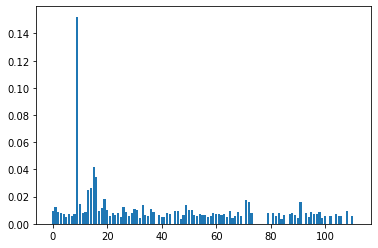

In [ ]:
from matplotlib import pyplot

pyplot.bar(range(len(model_xgb.feature_importances_)), model_xgb.feature_importances_)
pyplot.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
plot_feature_importance(model_xgb.feature_importances_, X_train.columns, 'XG BOOST')

ValueError: ignored

## XGBoost - HP Tuning: Grid Search

In [ ]:
#from sklearn.model_selection import GridSearchCV
#param = {'estimators__estimator__estimator__max_depth': [4, 5, 6, 7],
#         'estimators__estimator__estimator__n_estimators': [100, 150],
#         'estimators__estimator__estimator__subsample': [0.5, 0.7, 0.9],
#         'estimators__estimator__estimator__learning_rate': [0.09, 0.1, 0.2, 0.3]
#        }
#gridsearch = GridSearchCV(estimator = full_pipeline_XGB, 
#                          param_grid = param,
#                          scoring = 'roc_auc', 
#                          cv = 5, 
#                          verbose = 1, 
#                          n_jobs = -1)
#
#gridsearch.fit(X_train, y_train)
#gridsearch.best_params_

## XGBoost - HP Tuning: Random Search

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#param = {'estimators__estimator__estimator__max_depth': [5,6,7,8],
#         'estimators__estimator__estimator__n_estimators': [100,150,200],
#         'estimators__estimator__estimator__subsample': [0.3, 0.5, 0.9],
#         'estimators__estimator__estimator__learning_rate': [0.01,0.1,0.5,0.9]
#        }
#gridsearch = RandomizedSearchCV(estimator = full_pipeline_XGB, 
#                          param_distributions = param,
#                          scoring='roc_auc', 
#                          cv=5, 
#                          verbose=1, 
#                          n_jobs = -1)
#gridsearch.fit(X_train, y_train)
#gridsearch.best_params_

In [ ]:
#sorted(full_pipeline_XGB.get_params().keys())

#CATBoost

Basic Model - AUC: 0.8608432317939103

*#1*
HP Tuning Grid Search: depth = 6, iterations = 150, learning_rate = 0.1

Tuned Model (Grid Search) - AUC : 0.8609677722531754

*#2*
HP Tuning Grid Search: depth = 6, iterations = 350, learning_rate = 0.05

Tuned Model (Grid Search) - AUC : 0.8618574003261419

*#3*
HP Tuning Grid Search: depth = 6, iterations = 375, learning_rate = 0.05

Tuned Model (Grid Search) - **AUC : 0.8620155441427091**

*#4 - New Features*
HP Tuning Grid Search: depth = 6, iterations = 375, learning_rate = 0.05

Tuned Model (Grid Search) - AUC : 0.8635781306379087


In [ ]:
pip install catboost

     |████████████████████████████████| 69.2 MB 8.9 kB/s 


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier
from catboost import CatBoostClassifier

estimators = MultiOutputClassifier(
    estimator =(CatBoostClassifier(depth = 6, iterations = 375, learning_rate = 0.05))
)

full_pipeline_CAT = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

full_pipeline_CAT.fit(X_train, y_train)

preds_CAT = full_pipeline_CAT.predict_proba(X_eval)

preds_CAT

y_preds_CAT = pd.DataFrame(
    {
        "h1n1_vaccine": preds_CAT[0][:, 1],
        "seasonal_vaccine": preds_CAT[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_CAT.shape)
y_preds_CAT.head()

roc_auc_score(y_eval, y_preds_CAT)

0:	learn: 0.6573452	total: 156ms	remaining: 58.3s
1:	learn: 0.6247215	total: 241ms	remaining: 44.9s
2:	learn: 0.5957411	total: 320ms	remaining: 39.7s
3:	learn: 0.5709030	total: 399ms	remaining: 37s
4:	learn: 0.5494516	total: 482ms	remaining: 35.6s
5:	learn: 0.5305371	total: 546ms	remaining: 33.6s
6:	learn: 0.5134094	total: 618ms	remaining: 32.5s
7:	learn: 0.4978196	total: 687ms	remaining: 31.5s
8:	learn: 0.4834846	total: 768ms	remaining: 31.2s
9:	learn: 0.4727872	total: 857ms	remaining: 31.3s
10:	learn: 0.4617160	total: 929ms	remaining: 30.7s
11:	learn: 0.4514733	total: 1.01s	remaining: 30.6s
12:	learn: 0.4430446	total: 1.08s	remaining: 30.2s
13:	learn: 0.4349583	total: 1.16s	remaining: 29.9s
14:	learn: 0.4276752	total: 1.24s	remaining: 29.7s
15:	learn: 0.4222257	total: 1.34s	remaining: 30.2s
16:	learn: 0.4167201	total: 1.42s	remaining: 30s
17:	learn: 0.4114404	total: 1.5s	remaining: 29.8s
18:	learn: 0.4066569	total: 1.58s	remaining: 29.7s
19:	learn: 0.4020123	total: 1.66s	remaining: 2

0.8635781306379087

##CATBoost - HP Tuning: Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'estimators__estimator__depth': [6],
         'estimators__estimator__iterations': [375, 380, 383, 385],
         'estimators__estimator__learning_rate': [0.045, 0.046, 0.047, 0.048]
        }
gridsearch = GridSearchCV(estimator = full_pipeline_CAT, 
                          param_grid = param,
                          scoring = 'roc_auc', 
                          cv = 5, 
                          verbose = 1, 
                          n_jobs = -1)

gridsearch.fit(X_train, y_train)
gridsearch.best_params_

#SKV

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn import svm

estimators = MultiOutputClassifier(
    estimator =(svm.SVC(probability=True))
)

full_pipeline_SVM = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

full_pipeline_SVM.fit(X_train, y_train)

preds_SVM = full_pipeline_SVM.predict_proba(X_eval)

preds_SVM

y_preds_SVM = pd.DataFrame(
    {
        "h1n1_vaccine": preds_SVM[0][:, 1],
        "seasonal_vaccine": preds_SVM[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_SVM.shape)
y_preds_SVM.head()

roc_auc_score(y_eval, y_preds_SVM)

##SKV - HP Tuning: Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'estimators__estimator__C': [0.1, 1, 10],
         'estimators__estimator__gamma': [1, 0.1, 0.01, 0.001],
         'estimators__estimator__cache_size': [150, 200, 250]
        }
gridsearch = GridSearchCV(estimator = full_pipeline_SVM, 
                          param_grid = param,
                          scoring = 'roc_auc', 
                          cv = 5,
                          refit = True,
                          verbose = 1, 
                          n_jobs = -1)

gridsearch.fit(X_train, y_train)
gridsearch.best_params_

# Decision Tree

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier

estimators = MultiOutputClassifier(
    estimator = OneVsRestClassifier(DecisionTreeClassifier(max_depth=4))
)

full_pipeline_DT = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

full_pipeline_DT.fit(X_train, y_train)

preds_DT = full_pipeline_DT.predict_proba(X_eval)

preds_DT

y_preds_DT = pd.DataFrame(
    {
        "h1n1_vaccine": preds_DT[0][:, 1],
        "seasonal_vaccine": preds_DT[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_DT.shape)
y_preds_DT.head()

roc_auc_score(y_eval, y_preds_DT)

#Combination


In [ ]:
!pip3 install catboost

     |████████████████████████████████| 69.2 MB 4.7 kB/s 


In [ ]:
from sklearn.linear_model  import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [ ]:
cv = 10
methods = [
           ('logistic', MultiOutputClassifier(LogisticRegression(penalty="l2", C=1, max_iter=10000))), #
           ('xgb', MultiOutputClassifier(xgb.XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.7))),
           ('lgb', MultiOutputClassifier(lgb.LGBMClassifier(max_depth=3,n_estimators=200,learning_rate=0.1))),
           ('ada', MultiOutputClassifier(AdaBoostClassifier(n_estimators=200, learning_rate=0.5))),#
           ('rf', MultiOutputClassifier(RandomForestClassifier(n_estimators = 200, max_features= 'sqrt',min_samples_leaf=5))),
           ('knn', MultiOutputClassifier(KNeighborsClassifier(n_neighbors=49))),
        ]

In [ ]:
results = []

for method in methods:

    clf = Pipeline([
         ('transformer', transformer),
#          ('pca', PCA()),
         (method)
    ])

    # Perform cross-validation
    cross_val_scores = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=cv)
    
    results.append([method[0], clf, cross_val_scores])
    
    # Print avg. AUC
    print(method[0], " ", cv, "-fold AUC: ", np.mean(cross_val_scores), sep="")

logistic 10-fold AUC: 0.6642254185260016
xgb 10-fold AUC: 0.6877540900162695
lgb 10-fold AUC: 0.6871953058885617
ada 10-fold AUC: 0.679762827458928
rf 10-fold AUC: 0.6738384478704436
knn 10-fold AUC: 0.6313636406219261


In [ ]:
names = [result[0] for result in results]
scores = [result[2] for result in results]

In [ ]:

table=pd.DataFrame(names).combine_first(pd.DataFrame(scores))
table_=table.T
table_.columns = table_.iloc[0]
table_ = table_.iloc[1:]

['logistic', 'xgb', 'lgb', 'ada', 'rf', 'knn']

In [ ]:
pd.DataFrame(scores)

,0,1,2,3,4,5,6,7,8,9
0,0.670391,0.667039,0.669832,0.650084,0.670207,0.687535,0.666853,0.661822,0.639463,0.659027
1,0.696648,0.696089,0.686592,0.679150,0.692007,0.702627,0.696478,0.692566,0.667412,0.667971
2,0.692737,0.696648,0.686592,0.678591,0.697596,0.700950,0.694802,0.683622,0.673561,0.666853
3,0.688827,0.681006,0.673184,0.671325,0.683622,0.706540,0.695361,0.684181,0.651761,0.661822
4,0.679888,0.678212,0.672067,0.671884,0.673561,0.692007,0.688653,0.670207,0.651761,0.660145
5,0.629609,0.639665,0.635196,0.625489,0.645053,0.646171,0.637228,0.623253,0.604248,0.627725


In [ ]:
pd.DataFrame(scores).to_excel("output.xlsx")

In [ ]:
files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Stacking

##**RandomForest**

In [ ]:
method  =  MultiOutputClassifier(RandomForestClassifier(n_estimators = 200, max_features= 'sqrt',min_samples_leaf=5))
clf_rf = Pipeline([
         ('transformer', transformer),
         ("estimators", method)
    ])

clf_rf.fit(X_train, y_train)
preds = clf_rf.predict_proba(X_train)
pred = pd.DataFrame({'Index':X_train.index,
                     'rf_h1n1_vaccine':preds[0][:, 1],
                     'rf_seasonal_vaccine':preds[1][:, 1]})

pred.set_index('Index')

joined_df = X_train.join(pred)

joined_df.pop("Index")

respondent_id
16069     8800.0
15318    12914.0
21253        NaN
24458        NaN
17301     1662.0
          ...   
22851        NaN
10492     2564.0
12016     6622.0
8855      9565.0
1268     22275.0
Name: Index, Length: 17893, dtype: float64

In [ ]:
preds_eval = clf_rf.predict_proba(X_eval)
pred_eval = pd.DataFrame({'Index':X_eval.index,
                     'rf_h1n1_vaccine':preds_eval[0][:, 1],
                     'rf_seasonal_vaccine':preds_eval[1][:, 1]})

pred_eval.set_index('Index')

joined_df_eval = X_eval.join(pred_eval)

joined_df_eval.pop("Index")

respondent_id
6728     26600.0
16516        NaN
3106      9537.0
16981        NaN
19111        NaN
          ...   
6876     20520.0
5834      3036.0
13478        NaN
18399        NaN
13227        NaN
Name: Index, Length: 8814, dtype: float64

##**Logistic**

In [ ]:
method  =  MultiOutputClassifier(LogisticRegression(penalty="l2", C=1, max_iter=10000))
clf_Logistic = Pipeline([
         ('transformer', transformer),
         ("estimators", method)
    ])

clf_Logistic.fit(X_train, y_train)
preds = clf_Logistic.predict_proba(X_train)
pred = pd.DataFrame({'Index1':X_train.index,
                     'Logistic_h1n1_vaccine':preds[0][:, 1],
                     'Logistic_seasonal_vaccine':preds[1][:, 1]})

pred.set_index('Index1')

joined_df = joined_df.join(pred)

joined_df.pop("Index1")

respondent_id
16069     8800.0
15318    12914.0
21253        NaN
24458        NaN
17301     1662.0
          ...   
22851        NaN
10492     2564.0
12016     6622.0
8855      9565.0
1268     22275.0
Name: Index1, Length: 17893, dtype: float64

In [ ]:
preds_eval = clf_Logistic.predict_proba(X_eval)
pred_eval = pd.DataFrame({'Index1':X_eval.index,
                     'Logistic_h1n1_vaccine':preds_eval[0][:, 1],
                     'Logistic_seasonal_vaccine':preds_eval[1][:, 1]})

pred_eval.set_index('Index1')

joined_df_eval = joined_df_eval.join(pred_eval)

joined_df_eval.pop("Index1")

respondent_id
6728     26600.0
16516        NaN
3106      9537.0
16981        NaN
19111        NaN
          ...   
6876     20520.0
5834      3036.0
13478        NaN
18399        NaN
13227        NaN
Name: Index1, Length: 8814, dtype: float64

##Light Gradient 

In [ ]:
method  =  MultiOutputClassifier(lgb.LGBMClassifier(max_depth=3,n_estimators=200,learning_rate=0.1))
clf_lgb = Pipeline([
         ('transformer', transformer),
         ("estimators", method)
    ])

clf_lgb.fit(X_train, y_train)
preds = clf_lgb.predict_proba(X_train)
pred = pd.DataFrame({'Index1':X_train.index,
                     'lgb_h1n1_vaccine':preds[0][:, 1],
                     'lgb_seasonal_vaccine':preds[1][:, 1]})

pred.set_index('Index1')

joined_df = joined_df.join(pred)

joined_df.pop("Index1")


respondent_id
16069     8800.0
15318    12914.0
21253        NaN
24458        NaN
17301     1662.0
          ...   
22851        NaN
10492     2564.0
12016     6622.0
8855      9565.0
1268     22275.0
Name: Index1, Length: 17893, dtype: float64

In [ ]:
preds_eval = clf_lgb.predict_proba(X_eval)
pred_eval = pd.DataFrame({'Index1':X_eval.index,
                     'lgb_h1n1_vaccine':preds_eval[0][:, 1],
                     'lgb_seasonal_vaccine':preds_eval[1][:, 1]})

pred_eval.set_index('Index1')

joined_df_eval = joined_df_eval.join(pred_eval)

joined_df_eval.pop("Index1")

respondent_id
6728     26600.0
16516        NaN
3106      9537.0
16981        NaN
19111        NaN
          ...   
6876     20520.0
5834      3036.0
13478        NaN
18399        NaN
13227        NaN
Name: Index1, Length: 8814, dtype: float64

##ADA

In [ ]:
method  =  MultiOutputClassifier(AdaBoostClassifier(n_estimators=200, learning_rate=0.5))
clf_ada = Pipeline([
         ('transformer', transformer),
         ("estimators", method)
    ])

clf_ada.fit(X_train, y_train)
preds = clf_ada.predict_proba(X_train)
pred = pd.DataFrame({'Index1':X_train.index,
                     'ada_h1n1_vaccine':preds[0][:, 1],
                     'ada_seasonal_vaccine':preds[1][:, 1]})

pred.set_index('Index1')

joined_df = joined_df.join(pred)

joined_df.pop("Index1")

respondent_id
16069     8800.0
15318    12914.0
21253        NaN
24458        NaN
17301     1662.0
          ...   
22851        NaN
10492     2564.0
12016     6622.0
8855      9565.0
1268     22275.0
Name: Index1, Length: 17893, dtype: float64

In [ ]:
preds_eval = clf_ada.predict_proba(X_eval)
pred_eval = pd.DataFrame({'Index1':X_eval.index,
                     'ada_h1n1_vaccine':preds_eval[0][:, 1],
                     'ada_seasonal_vaccine':preds_eval[1][:, 1]})

pred_eval.set_index('Index1')

joined_df_eval = joined_df_eval.join(pred_eval)

joined_df_eval.pop("Index1")

respondent_id
6728     26600.0
16516        NaN
3106      9537.0
16981        NaN
19111        NaN
          ...   
6876     20520.0
5834      3036.0
13478        NaN
18399        NaN
13227        NaN
Name: Index1, Length: 8814, dtype: float64

##XGboost

In [ ]:
method  =  MultiOutputClassifier(xgb.XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.7))
clf_xgb = Pipeline([
         ('transformer', transformer),
         ("estimators", method)
    ])

clf_xgb.fit(X_train, y_train)
preds = clf_xgb.predict_proba(X_train)
pred = pd.DataFrame({'Index1':X_train.index,
                     'xgb_h1n1_vaccine':preds[0][:, 1],
                     'xgb_seasonal_vaccine':preds[1][:, 1]})

pred.set_index('Index1')

joined_df = joined_df.join(pred)

joined_df.pop("Index1")

respondent_id
16069     8800.0
15318    12914.0
21253        NaN
24458        NaN
17301     1662.0
          ...   
22851        NaN
10492     2564.0
12016     6622.0
8855      9565.0
1268     22275.0
Name: Index1, Length: 17893, dtype: float64

In [ ]:
preds_eval = clf_xgb.predict_proba(X_eval)
pred_eval = pd.DataFrame({'Index1':X_eval.index,
                     'xgb_h1n1_vaccine':preds_eval[0][:, 1],
                     'xgb_seasonal_vaccine':preds_eval[1][:, 1]})

pred_eval.set_index('Index1')

joined_df_eval = joined_df_eval.join(pred_eval)

joined_df_eval.pop("Index1")

respondent_id
6728     26600.0
16516        NaN
3106      9537.0
16981        NaN
19111        NaN
          ...   
6876     20520.0
5834      3036.0
13478        NaN
18399        NaN
13227        NaN
Name: Index1, Length: 8814, dtype: float64

##CATBoost

In [ ]:
method  =  MultiOutputClassifier(CatBoostClassifier(depth = 6, iterations = 375, learning_rate = 0.05))
clf_CAT = Pipeline([
         ('transformer', transformer),
         ("estimators", method)
    ])

clf_CAT.fit(X_train, y_train)
preds = clf_CAT.predict_proba(X_train)
pred = pd.DataFrame({'Index1':X_train.index,
                     'CAT_h1n1_vaccine':preds[0][:, 1],
                     'CAT_seasonal_vaccine':preds[1][:, 1]})

pred.set_index('Index1')

joined_df = joined_df.join(pred)

joined_df.pop("Index1")

0:	learn: 0.6573452	total: 161ms	remaining: 1m
1:	learn: 0.6247215	total: 238ms	remaining: 44.4s
2:	learn: 0.5957411	total: 312ms	remaining: 38.6s
3:	learn: 0.5709030	total: 395ms	remaining: 36.6s
4:	learn: 0.5494516	total: 478ms	remaining: 35.4s
5:	learn: 0.5305371	total: 547ms	remaining: 33.6s
6:	learn: 0.5134094	total: 635ms	remaining: 33.4s
7:	learn: 0.4978196	total: 707ms	remaining: 32.4s
8:	learn: 0.4834846	total: 789ms	remaining: 32.1s
9:	learn: 0.4727872	total: 878ms	remaining: 32.1s
10:	learn: 0.4617160	total: 952ms	remaining: 31.5s
11:	learn: 0.4514733	total: 1.03s	remaining: 31.2s
12:	learn: 0.4430446	total: 1.11s	remaining: 30.9s
13:	learn: 0.4349583	total: 1.19s	remaining: 30.6s
14:	learn: 0.4276752	total: 1.26s	remaining: 30.4s
15:	learn: 0.4222257	total: 1.35s	remaining: 30.4s
16:	learn: 0.4167201	total: 1.43s	remaining: 30.2s
17:	learn: 0.4114404	total: 1.52s	remaining: 30.1s
18:	learn: 0.4066569	total: 1.61s	remaining: 30.2s
19:	learn: 0.4020123	total: 1.69s	remaining:

respondent_id
16069     8800.0
15318    12914.0
21253        NaN
24458        NaN
17301     1662.0
          ...   
22851        NaN
10492     2564.0
12016     6622.0
8855      9565.0
1268     22275.0
Name: Index1, Length: 17893, dtype: float64

In [ ]:
preds_eval = clf_CAT.predict_proba(X_eval)
pred_eval = pd.DataFrame({'Index1':X_eval.index,
                     'CAT_h1n1_vaccine':preds_eval[0][:, 1],
                     'CAT_seasonal_vaccine':preds_eval[1][:, 1]})

pred_eval.set_index('Index1')

joined_df_eval = joined_df_eval.join(pred_eval)

joined_df_eval.pop("Index1")

respondent_id
6728     26600.0
16516        NaN
3106      9537.0
16981        NaN
19111        NaN
          ...   
6876     20520.0
5834      3036.0
13478        NaN
18399        NaN
13227        NaN
Name: Index1, Length: 8814, dtype: float64

**Stack Model**

In [ ]:
numeric_cols = joined_df.columns[joined_df.dtypes != "object"].values
Categorical = joined_df.columns[joined_df.dtypes == "object"].values

##V2
##replacing missing variables
##Feature engenering 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', KNNImputer(n_neighbors=17))
])

categorical_transformer = Pipeline(steps=[
    ('si1',SimpleImputer(strategy='constant',fill_value='NAN')),                                      
    ('imputer', SimpleImputer(strategy='constant',missing_values = None, fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols),
        ('cat', categorical_transformer, Categorical)
    ],
    remainder = "drop"
)
transformer = Pipeline([
         ('preprocessor', preprocessor)])


In [ ]:
#final model
method  =  MultiOutputClassifier(xgb.XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.7))

clf = Pipeline([
         ('transformer', transformer),
         ("estimators", method)
    ])

clf.fit(joined_df, y_train)
pred_stack = clf.predict_proba(joined_df_eval)


In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": pred_stack[0][:, 1],
        "seasonal_vaccine": pred_stack[1][:, 1],
    }, index = y_eval.index
)

roc_auc_score(y_eval, y_preds)

0.8615786965518184

##predict model Result for submission

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
test_features_df  = pd.read_csv(io.BytesIO(uploaded['test_set_features.csv']), 
    index_col="respondent_id")

Saving test_set_features.csv to test_set_features (1).csv


In [ ]:
# creating and entity set 'es'
es = ft.EntitySet(id = 'information')

# adding a dataframe 
es.entity_from_dataframe(entity_id = 'data', dataframe = test_features_df, index = 'respondent_id')

/usr/local/lib/python3.7/dist-packages/featuretools/entityset/entity.py:463: UserWarning: index respondent_id not found in dataframe, creating new integer column
  "integer column".format(index))


Entityset: information
  Entities:
    data [Rows: 26708, Columns: 36]
  Relationships:
    No relationships

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import featuretools as ft

# Load data and put into dataframe
df = pd.DataFrame(test_features_df)

In [ ]:
# Make an entityset and add the entity
es = ft.EntitySet(id = 'iris')
es.entity_from_dataframe(entity_id = 'data', dataframe = df)

# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data',
                                      trans_primitives = [
                                                          'add_numeric',
                                                          'multiply_numeric'
                                                          ])

feature_matrix.head()
test_features_df=feature_matrix

/usr/local/lib/python3.7/dist-packages/featuretools/entityset/entity.py:452: UserWarning: Using first column as index. To change this, specify the index parameter
  warnings.warn(("Using first column as index. "
/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:152: UserWarning: Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn("Only one entity in entityset, changing max_depth to "


In [ ]:
preds_rf = clf_rf.predict_proba(test_features_df)
preds_lg = clf_Logistic.predict_proba(test_features_df)
preds_lgb = clf_lgb.predict_proba(test_features_df)
preds_ada = clf_ada.predict_proba(test_features_df)
preds_xgb = clf_xgb.predict_proba(test_features_df)
preds_CAT = clf_CAT.predict_proba(test_features_df)

pred_eval = pd.DataFrame({
                     'rf_h1n1_vaccine':preds_rf[0][:, 1],
                     'rf_seasonal_vaccine':preds_rf[1][:, 1],
                     'Logistic_h1n1_vaccine':preds_lg[0][:, 1],
                     'Logistic_seasonal_vaccine':preds_lg[1][:, 1],
                     'lgb_h1n1_vaccine':preds_lgb[0][:, 1],
                     'lgb_seasonal_vaccine':preds_lgb[1][:, 1],
                     'ada_h1n1_vaccine':preds_ada[0][:, 1],
                     'ada_seasonal_vaccine':preds_ada[1][:, 1],
                     'xgb_h1n1_vaccine':preds_xgb[0][:, 1],
                     'xgb_seasonal_vaccine':preds_xgb[1][:, 1],
                     'CAT_h1n1_vaccine':preds_xgb[0][:, 1],
                     'CAT_seasonal_vaccine':preds_xgb[1][:, 1]
                     }
                     , index = test_features_df.index)

joined_df_test = test_features_df.join(pred_eval)

KeyboardInterrupt: ignored

In [ ]:
joined_df_test

In [ ]:
numeric_cols = joined_df_test.columns[joined_df_test.dtypes != "object"].values
Categorical = joined_df_test.columns[joined_df_test.dtypes == "object"].values

##V2
##replacing missing variables
##Feature engenering 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', KNNImputer(n_neighbors=17))
])

categorical_transformer = Pipeline(steps=[
    ('si1',SimpleImputer(strategy='constant',fill_value='NAN')),                                      
    ('imputer', SimpleImputer(strategy='constant',missing_values = None, fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols),
        ('cat', categorical_transformer, Categorical)
    ],
    remainder = "drop"
)
transformer = Pipeline([
         ('preprocessor', preprocessor)])


In [ ]:
#final model
pred_stack = clf.predict_proba(joined_df_test)


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
submission_df  = pd.read_csv(io.BytesIO(uploaded['submission_format.csv']), 
    index_col="respondent_id")

In [ ]:
joined_df_test.reset_index(drop=True)

In [ ]:
joined_df_test['index']=submission_df.index.values

In [ ]:
joined_df_test=joined_df_test.set_index(['index'])

In [ ]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(joined_df_test.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = pred_stack[0][:, 1]
submission_df["seasonal_vaccine"] = pred_stack[1][:, 1]

submission_df

In [ ]:
submission_df.to_excel("output.xlsx")

In [ ]:
files.download('output.xlsx')

In [ ]:
from google.colab import files
submission_df.to_csv('my_submission.csv', index=True)
files.download('my_submission.csv')

In [ ]:
submission_df.index.values

#Train and predict model

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
test_features_df  = pd.read_csv(io.BytesIO(uploaded['test_set_features.csv']), 
    index_col="respondent_id")

Saving test_set_features.csv to test_set_features.csv


In [ ]:
test_probas = full_pipeline_CAT.predict_proba(test_features_df)
test_probas

[array([[0.82322364, 0.17677636],
        [0.97751913, 0.02248087],
        [0.83401759, 0.16598241],
        ...,
        [0.81128443, 0.18871557],
        [0.9798763 , 0.0201237 ],
        [0.39517934, 0.60482066]]), array([[0.73680235, 0.26319765],
        [0.98178772, 0.01821228],
        [0.30094583, 0.69905417],
        ...,
        [0.74703776, 0.25296224],
        [0.58863701, 0.41136299],
        [0.35827028, 0.64172972]])]

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
submission_df  = pd.read_csv(io.BytesIO(uploaded['submission_format.csv']), 
    index_col="respondent_id")


Saving submission_format.csv to submission_format.csv


In [ ]:
# Make sure we have the rows in the same order

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.176776,0.263198
26708,0.022481,0.018212
26709,0.165982,0.699054
26710,0.605604,0.901896
26711,0.321300,0.600790


In [ ]:
submission_df.to_csv('my_submission.csv', index=True)

In [ ]:
from google.colab import files
submission_df.to_csv('my_submission.csv', index=True)
files.download('my_submission.csv')

In [ ]:
!head my_submission.csv